<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/4_knn/knn_1_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_path = '/content/drive/MyDrive/dm_fire_prediction/merge/merged_v2_no_duplicates_undersampled_23_77.csv'

In [ ]:
df = pd.read_csv(input_path)
df.head()

,lcccode_label,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M,fire
0,6.0,472.0,12.5,38.4,32.7,28.9,1.455,1.833,0.8545,8.11,...,38,15,15,13,24,5,0,0,1,0
1,3.0,302.0,12.0,57.0,27.0,16.0,1.430,1.650,0.6160,7.80,...,43,21,18,15,26,5,0,0,1,0
2,1.0,692.0,22.2,53.0,27.0,20.0,1.413,1.715,0.7688,7.86,...,36,15,15,11,22,6,0,0,1,0
3,19.0,108.0,4.0,47.0,36.0,17.0,1.320,1.660,0.4590,8.00,...,41,18,18,16,27,6,0,0,1,0
4,0.0,619.0,10.1,37.0,36.7,26.3,1.447,1.797,1.7637,7.61,...,30,13,13,9,19,5,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17086 entries, 0 to 17085
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lcccode_label    17086 non-null  float64
 1   elevation        17086 non-null  float64
 2   COARSE           17086 non-null  float64
 3   SAND             17086 non-null  float64
 4   SILT             17086 non-null  float64
 5   CLAY             17086 non-null  float64
 6   BULK             17086 non-null  float64
 7   REF_BULK         17086 non-null  float64
 8   ORG_CARBON       17086 non-null  float64
 9   PH_WATER         17086 non-null  float64
 10  TOTAL_N          17086 non-null  float64
 11  CN_RATIO         17086 non-null  float64
 12  CEC_SOIL         17086 non-null  float64
 13  CEC_CLAY         17086 non-null  float64
 14  CEC_EFF          17086 non-null  float64
 15  TEB              17086 non-null  float64
 16  BSAT             17086 non-null  float64
 17  ALUM_SAT    

## Handling imbalance

### Split (before resampling and feature engineering)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

X = df.drop(columns=['fire'])
y = df['fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15377, 38)
(1709, 38)
(15377,)
(1709,)


## Feature Selection

In [ ]:
# corr_matrix2 = X_train.corr(method='spearman')
# corr_matrix2

In [ ]:
# threshold = 0.95

# # Select upper triangle of correlation matrix
# upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))

# # Find features with correlation greater than threshold
# strong_corr_pairs2 = [(col, row, upper2.loc[row, col])
#                      for col in upper2.columns
#                      for row in upper2.index
#                      if (upper2.loc[row, col] > threshold)]

# strong_corr_df2 = pd.DataFrame(strong_corr_pairs2, columns=['Feature_1', 'Feature_2', 'Correlation'])

# print(strong_corr_df2)

### Removing Correlated Features

In [ ]:
corr_matrix = X_train.corr()
corr_matrix

,lcccode_label,elevation,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,tmax_spring,tmax_summer,tmax_winter,tmin_autumn,tmin_spring,tmin_summer,tmin_winter,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
lcccode_label,1.000000,-0.077457,0.108902,0.466444,-0.358289,-0.449353,-0.112163,-0.460562,-0.454946,0.286306,...,0.589729,0.596783,0.479628,0.419892,0.512343,0.561214,0.070774,0.083210,-0.155822,0.048126
elevation,-0.077457,1.000000,0.103875,-0.006229,0.047958,-0.024219,0.010932,0.008618,0.040340,0.123955,...,-0.445897,-0.340316,-0.625682,-0.754895,-0.606830,-0.506379,-0.815796,-0.022568,-0.038366,0.043411
COARSE,0.108902,0.103875,1.000000,0.539297,-0.537238,-0.433446,-0.282602,-0.419107,-0.169865,0.164936,...,0.144980,0.197962,0.051102,0.067924,0.123227,0.174707,-0.054458,0.066894,-0.189933,0.083974
SAND,0.466444,-0.006229,0.539297,1.000000,-0.829486,-0.920408,-0.371922,-0.933720,-0.745761,0.458696,...,0.612146,0.647325,0.445251,0.422186,0.531957,0.598061,0.036624,0.277343,-0.299644,0.006540
SILT,-0.358289,0.047958,-0.537238,-0.829486,1.000000,0.545106,0.193511,0.603041,0.611788,-0.372563,...,-0.509864,-0.538154,-0.383721,-0.352031,-0.430521,-0.474853,-0.057644,-0.346823,0.038712,0.227120
CLAY,-0.449353,-0.024219,-0.433446,-0.920408,0.545106,1.000000,0.422813,0.979427,0.691172,-0.427730,...,-0.561957,-0.594959,-0.399739,-0.387301,-0.497129,-0.565322,-0.014624,-0.173532,0.422678,-0.168796
BULK,-0.112163,0.010932,-0.282602,-0.371922,0.193511,0.422813,1.000000,0.366702,0.175879,-0.073831,...,-0.179323,-0.203710,-0.134075,-0.125931,-0.166659,-0.193179,-0.046752,0.045226,0.024398,-0.050238
REF_BULK,-0.460562,0.008618,-0.419107,-0.933720,0.603041,0.979427,0.366702,1.000000,0.699780,-0.395282,...,-0.575374,-0.603569,-0.421390,-0.411791,-0.518790,-0.581291,-0.052129,-0.258880,0.387231,-0.081410
ORG_CARBON,-0.454946,0.040340,-0.169865,-0.745761,0.611788,0.691172,0.175879,0.699780,1.000000,-0.775231,...,-0.625699,-0.667270,-0.456703,-0.422845,-0.529748,-0.596278,-0.039438,-0.123496,0.322512,-0.135327
PH_WATER,0.286306,0.123955,0.164936,0.458696,-0.372563,-0.427730,-0.073831,-0.395282,-0.775231,1.000000,...,0.376167,0.454101,0.197274,0.157511,0.257730,0.346590,-0.138451,0.019255,-0.438786,0.293166


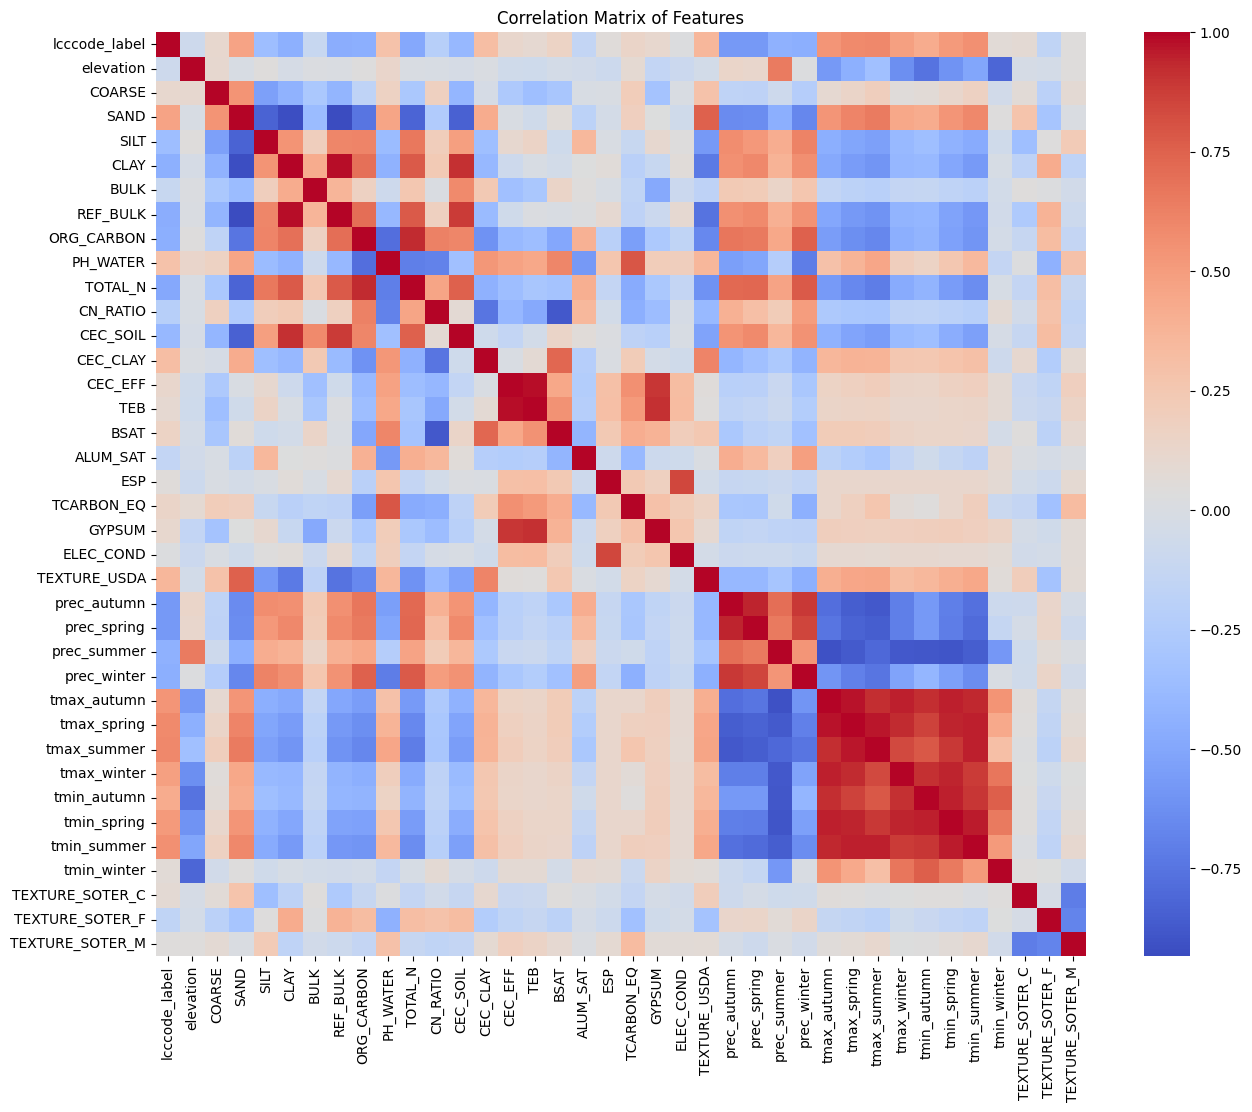

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Extracting highly linearly correlated feature pairs (corr > 0.95)

In [ ]:
threshold = 0.95

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0     REF_BULK         CLAY     0.979427
1          TEB      CEC_EFF     0.983537
2  tmax_spring  tmax_autumn     0.975136
3  tmax_summer  tmax_spring     0.967561
4  tmax_winter  tmax_autumn     0.954366
5  tmin_spring  tmax_autumn     0.953743
6  tmin_spring  tmin_autumn     0.952095
7  tmin_summer  tmax_spring     0.950620
8  tmin_summer  tmin_spring     0.960157


#### `REF_BULK` and `CLAY`

The pair CLAY–REF_BULK shows a very high correlation (r ≈ 0.98), meaning they carry almost the same information. However, CLAY should be kept and REF_BULK removed for the following reasons:

📌 1. Direct relevance to USDA soil texture classification

The USDA texture class is explicitly defined using particle-size fractions, including the proportion of clay-sized particles (< 2 μm).

Clay percentage directly determines whether a soil is “Clay,” “Silty Clay,” “Clay Loam,” etc.

It is a primary classification variable in pedology.

Because clay content is baked into the very rules of soil texture classes, it has direct predictive power for anything related to soil behavior, water retention, and possibly fire susceptibility.

📌 2. CLAY is a primary physical soil property; REF_BULK is a derived structural property

Clay % is a fundamental intrinsic property tied to mineral composition.

Reference bulk density reflects how tightly particles are packed, which is influenced by clay content, organic matter, and structure.

REF_BULK is therefore a secondary property, and its high correlation with CLAY is expected because clay-rich soils have lower bulk density due to high porosity.
When two variables reflect the same phenomenon, we keep the more fundamental and directly interpretable one.

📌 3. CLAY is more stable and consistent across datasets

Clay percentage is measured or estimated consistently in global datasets like WISE30sec.

Reference bulk density varies more due to local compaction, management practices, and measurement methods.

Keeping the more universally standardized feature enhances model robustness.

📌 4. CLAY aligns better with soil processes relevant to fire prediction

Clay content influences:

water retention

infiltration

drying rate

heat propagation

vegetation type and fuel structure

Bulk density indirectly reflects some of these via porosity, but clay does so more directly.

Thus, CLAY has clearer mechanistic relevance for fire risk modeling.

📌 Conclusion

CLAY should be retained because it is the primary soil property defining texture, has direct physical meaning, is more stable, and is central to soil classification systems such as the USDA texture classes.
Reference bulk density is derivative, less fundamental, and redundant given the very high correlation.

In [ ]:
X_train.drop(columns=['REF_BULK'], inplace=True)

#### `CLAY` and `TEXTURE_USDA` statistical test

In [ ]:
df['TEXTURE_USDA'].value_counts()

,count
TEXTURE_USDA,
9.0,9591
11.0,4165
5.0,3151
12.0,92
3.0,51
10.0,36


here the appropriate test is an ANOVA test, to check whether point estimates (mean) of CLAY change accros groups of TEXTURE_USDA.

In [ ]:
df.groupby('TEXTURE_USDA')['CLAY'].describe()


,count,mean,std,min,25%,50%,75%,max
TEXTURE_USDA,,,,,,,,
3.0,51.0,50.941176,1.173231,50.0,50.375,50.75,50.7500,54.0
5.0,3151.0,28.918343,3.881572,14.8,26.300,27.50,29.7000,50.8
9.0,9591.0,17.936029,4.450687,13.8,15.000,17.00,18.7000,47.2
10.0,36.0,24.804167,2.640492,18.2,24.000,24.05,24.0500,29.0
11.0,4165.0,16.363013,2.390458,12.6,16.000,16.10,16.2000,43.2
12.0,92.0,12.479891,2.554656,9.2,11.400,11.40,12.0125,19.0


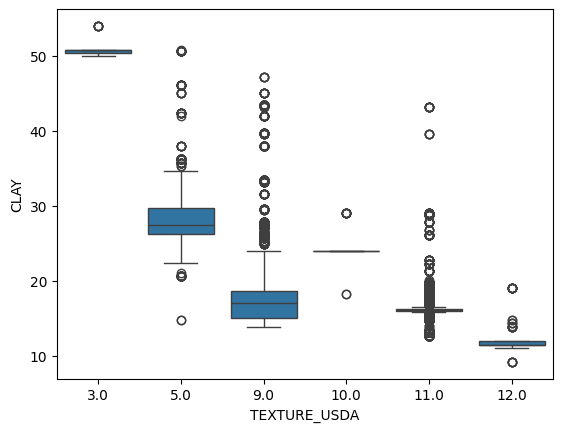

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='TEXTURE_USDA', y='CLAY')
plt.show()

The feature is imbalanced, it is derived from:
- Clay %
- Silt %
- Sand %

I'm just dropping it

In [ ]:
X_train.drop(columns=['TEXTURE_USDA'], inplace=True)

#### `CLAY` and `TEXTURE_SOTER` statistical test

In [ ]:
X_train['TEXTURE_SOTER'] = X_train[['TEXTURE_SOTER_C','TEXTURE_SOTER_M','TEXTURE_SOTER_F']].idxmax(axis=1).str[-1]
X_train['TEXTURE_SOTER'].head()


,TEXTURE_SOTER
16067,M
11072,M
16756,M
4147,M
15083,M


In [ ]:
X_train['TEXTURE_SOTER'].value_counts()

,count
TEXTURE_SOTER,
M,14567
C,424
F,386


M dominates the dataset, better to drop this attribute, since meaning is captured by other features.

In [ ]:
# import pandas as pd
# import scipy.stats as stats

# contingency = pd.crosstab(X_train['TEXTURE_SOTER'], y_train)
# print(contingency)

# chi2, p, dof, expected = stats.chi2_contingency(contingency)
# print("Chi-square:", chi2)
# print("p-value:", p)

In [ ]:
X_train.drop(columns=['TEXTURE_SOTER_M'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER_F'], inplace=True)
X_train.drop(columns=['TEXTURE_SOTER_C'], inplace=True)

#### `TEB` and `CEC_EFF`

TEB (Total Exchangeable Bases)

Sum of base cations:

Ca²⁺

Mg²⁺

K⁺

Na⁺

It measures base saturation, soil fertility, and nutrient storage.

CEC_EFF (Effective Cation Exchange Capacity, ECEC)

Sum of:

Ca²⁺

Mg²⁺

K⁺

Na⁺ (same as TEB)
PLUS:

exchangeable acidity

H⁺

Al³⁺

So:

CEC_EFF = TEB + exchangeable acidity

=> Drop TEB since it's already contained within CEC_EFF

In [ ]:
X_train.drop(columns=['TEB'], inplace=True)

#### Temperatures

4 seasons are overkill, reducing to 2 seasons (warm and cool)

In [ ]:
tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

# Warm season: Spring + Summer
X_train['tmax_warm'] = X_train[['tmax_spring', 'tmax_summer']].mean(axis=1)
X_train['tmin_warm'] = X_train[['tmin_spring', 'tmin_summer']].mean(axis=1)

# Cool season: Autumn + Winter
X_train['tmax_cool'] = X_train[['tmax_autumn', 'tmax_winter']].mean(axis=1)
X_train['tmin_cool'] = X_train[['tmin_autumn', 'tmin_winter']].mean(axis=1)

X_train = X_train.drop(columns=tmax_cols + tmin_cols)

print(X_train[['tmax_warm','tmax_cool','tmin_warm','tmin_cool']].head())


       tmax_warm  tmax_cool  tmin_warm  tmin_cool
16067       36.5       26.5       20.5       11.0
11072       34.0       23.0       18.0        8.5
16756       31.0       24.0       18.5       13.0
4147        37.0       25.5       21.5       11.5
15083       27.5       22.0       16.0       12.0


#### Wrap-up

In [ ]:
corr_matrix = X_train.corr()
threshold = 0.9

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)

     Feature_1    Feature_2  Correlation
0      TOTAL_N   ORG_CARBON     0.928531
1     CEC_SOIL         CLAY     0.910621
2  prec_spring  prec_autumn     0.940305
3    tmin_warm    tmax_warm     0.950396
4    tmax_cool    tmax_warm     0.937357
5    tmax_cool    tmin_warm     0.947727


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15377 entries, 16067 to 4534
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  15377 non-null  float64
 1   elevation      15377 non-null  float64
 2   COARSE         15377 non-null  float64
 3   SAND           15377 non-null  float64
 4   SILT           15377 non-null  float64
 5   CLAY           15377 non-null  float64
 6   BULK           15377 non-null  float64
 7   ORG_CARBON     15377 non-null  float64
 8   PH_WATER       15377 non-null  float64
 9   TOTAL_N        15377 non-null  float64
 10  CN_RATIO       15377 non-null  float64
 11  CEC_SOIL       15377 non-null  float64
 12  CEC_CLAY       15377 non-null  float64
 13  CEC_EFF        15377 non-null  float64
 14  BSAT           15377 non-null  float64
 15  ALUM_SAT       15377 non-null  float64
 16  ESP            15377 non-null  float64
 17  TCARBON_EQ     15377 non-null  float64
 18  GYPSUM  

clay + silt + sand = 100

In [ ]:
(X_train['CLAY'] + X_train['SILT'] + X_train['SAND']).value_counts()

,count
100.0,14285
100.0,510
100.0,486
100.0,95
100.0,1


1️⃣ Clay

Tiny, tiny bits of dirt — so small you can’t see them.

Feels sticky when wet and hard when dry or baked.

Holds lots of water because the tiny bits pack together tightly.

Think: like flour in dough — soft, sticky, holds water.

2️⃣ Silt

A bit bigger than clay, but still very small.

Feels smooth and slippery, kind of like baby powder.

Holds some water, but not as much as clay.

Think: like powdered sugar — soft, smooth, not sticky.

3️⃣ Sand

Big bits of dirt you can see and feel.

Feels gritty and drains water quickly.

Doesn’t stick together well.

Think: like beach sand — rough, loose, lets water flow through.

All soil is made by mixing clay + silt + sand in different amounts.

More clay → sticky soil, holds water → **harder for fire to start**

More sand → dry, drains fast → **easier for fire to start**

More silt → smooth soil, somewhere in between

=> drop silt, and keep clay and sand since (1) they hold more predictive power and (2) silt can be extracted from the 2 impilictly because of perfect linearity.

In [ ]:
X_train.drop(columns=['SILT'], inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15377 entries, 16067 to 4534
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  15377 non-null  float64
 1   elevation      15377 non-null  float64
 2   COARSE         15377 non-null  float64
 3   SAND           15377 non-null  float64
 4   CLAY           15377 non-null  float64
 5   BULK           15377 non-null  float64
 6   ORG_CARBON     15377 non-null  float64
 7   PH_WATER       15377 non-null  float64
 8   TOTAL_N        15377 non-null  float64
 9   CN_RATIO       15377 non-null  float64
 10  CEC_SOIL       15377 non-null  float64
 11  CEC_CLAY       15377 non-null  float64
 12  CEC_EFF        15377 non-null  float64
 13  BSAT           15377 non-null  float64
 14  ALUM_SAT       15377 non-null  float64
 15  ESP            15377 non-null  float64
 16  TCARBON_EQ     15377 non-null  float64
 17  GYPSUM         15377 non-null  float64
 18  ELEC_CON

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi = mutual_info_classif(X_train, y_train, random_state=42)

mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print(mi_series)


TOTAL_N          0.103296
ORG_CARBON       0.099615
GYPSUM           0.097550
PH_WATER         0.097511
TCARBON_EQ       0.096995
CEC_CLAY         0.094301
prec_spring      0.092967
prec_winter      0.091641
BULK             0.086525
SAND             0.086010
CEC_EFF          0.083211
CLAY             0.077141
prec_autumn      0.074039
COARSE           0.071332
CEC_SOIL         0.069653
BSAT             0.069072
ESP              0.062643
CN_RATIO         0.047889
elevation        0.046475
tmin_warm        0.033974
tmax_warm        0.032194
lcccode_label    0.028667
tmax_cool        0.024834
ELEC_COND        0.024422
prec_summer      0.021842
ALUM_SAT         0.019458
tmin_cool        0.016876
dtype: float64


consider dropping elec_cond and alum_sat

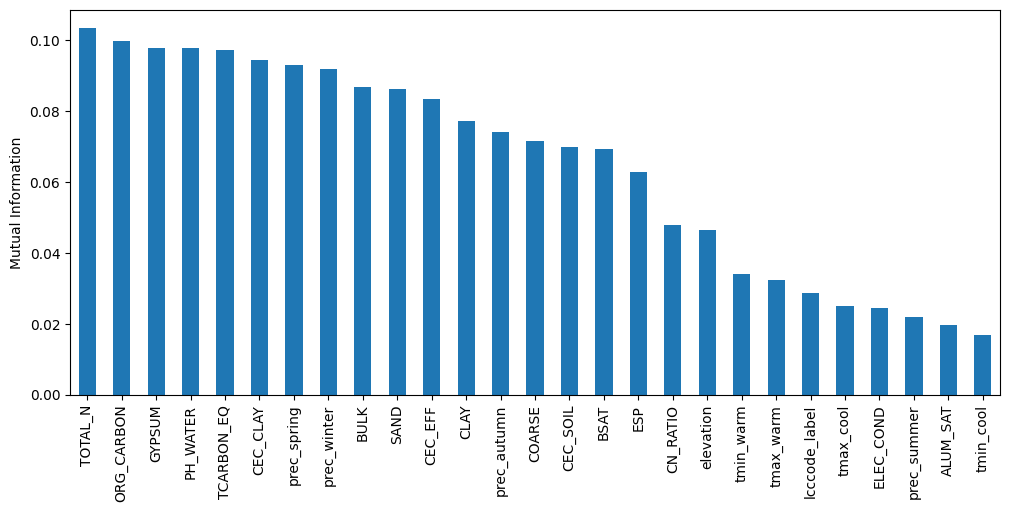

In [ ]:
import matplotlib.pyplot as plt

mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.ylabel("Mutual Information")
plt.show()

### Removing Features not relevant to the task

### Feature Engineering

#### Scaling

In [ ]:
stats = X_train.describe()

In [ ]:
stats.iloc[:, :10]

,lcccode_label,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO
count,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000
mean,9.804058,521.374911,11.363322,49.437823,19.665260,1.429282,0.890857,7.726705,0.879761,10.040606
std,7.641982,340.630673,3.918247,9.345742,6.226206,0.045822,0.452015,0.469294,0.262577,1.003198
min,0.000000,-30.000000,2.000000,15.000000,9.200000,1.110000,0.361000,4.960000,0.446000,8.000000
25%,3.000000,249.000000,9.200000,42.100000,16.000000,1.410000,0.639700,7.730000,0.690000,9.000000
50%,7.000000,471.000000,12.000000,51.900000,17.100000,1.430000,0.701200,7.800000,0.780000,9.800000
75%,18.000000,732.000000,14.300000,57.500000,21.000000,1.448000,0.884500,7.990000,0.994000,11.000000
max,21.000000,1950.000000,37.600000,79.500000,54.000000,1.760000,4.192600,8.600000,2.962000,18.050000


In [ ]:
stats.iloc[:, 10:20]

,CEC_SOIL,CEC_CLAY,CEC_EFF,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,prec_autumn
count,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000
mean,14.043897,58.928292,35.379219,91.932402,0.301028,4.479167,9.052267,3.550504,1.574956,49.586005
std,3.952012,10.954088,15.040671,7.739720,1.657640,6.695109,3.616416,6.985886,2.364472,44.513817
min,5.800000,26.800000,9.000000,28.600000,0.000000,1.000000,0.000000,0.060000,0.100000,2.000000
25%,11.600000,51.000000,30.200000,82.000000,0.000000,2.500000,6.870000,0.495000,1.000000,10.000000
50%,13.400000,59.100000,31.500000,92.800000,0.000000,2.600000,9.585000,1.420000,1.000000,40.000000
75%,15.400000,69.800000,35.200000,99.100000,0.000000,4.000000,11.010000,2.980000,1.300000,79.000000
max,40.150000,83.000000,143.000000,100.000000,24.000000,63.000000,27.059999,57.599998,32.000000,231.000000


#### Transform skewed data

In [ ]:
# Get numerical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
# Drop categorical columns
numerical_columns = numerical_columns.drop(['lcccode_label'])
numerical_columns

Index(['elevation', 'COARSE', 'SAND', 'CLAY', 'BULK', 'ORG_CARBON', 'PH_WATER',
       'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND', 'prec_autumn',
       'prec_spring', 'prec_summer', 'prec_winter', 'tmax_warm', 'tmin_warm'],
      dtype='object')

In [ ]:
numerical_0s = X_train.loc[:, (X_train == 0).any()].select_dtypes(include=['number']).columns
numerical_0s

Index(['lcccode_label', 'elevation', 'ALUM_SAT', 'TCARBON_EQ', 'prec_spring',
       'prec_summer', 'prec_winter'],
      dtype='object')

In [ ]:
numerical_neg = X_train.loc[:, (X_train < 0).any()].select_dtypes(include=['number']).columns
numerical_neg

Index(['elevation'], dtype='object')

In [ ]:
# # Identify columns containing zeros
# numerical_0s = df.loc[:, (df <= 0).any()].select_dtypes(include=['number']).columns

# # Remove columns that contain zeros from consideration
# numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = X_train[numerical_columns].skew()

# Set threshold for skewness
skewed_columns = skewness[abs(skewness) > 2]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
PH_WATER      -2.140014
CEC_SOIL       2.253440
CEC_EFF        2.740094
ALUM_SAT       7.422756
ESP            5.916952
GYPSUM         3.910124
ELEC_COND      8.293683
prec_winter    2.179909
dtype: float64


Since there are values <= 0, we will use a shifted version of log1p to get strictly positive values.

In [ ]:
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

def shifted_log1p(x):
    # shift each column independently
    return np.log1p(x - np.min(x, axis=0) + 1)

log_transformer = FunctionTransformer(shifted_log1p, validate=False)

preprocess = ColumnTransformer([
    ('log', Pipeline([
        ('log', log_transformer),
        ('scale', RobustScaler())
    ]), skewed_columns.index.tolist()),

    ('scale_only', RobustScaler(), X_train.columns.difference(skewed_columns.index).tolist())
])

X_train_scaled = preprocess.fit_transform(X_train)
X_train_scaled

array([[ 4.61453035e-01,  1.27928217e-01,  1.23967648e-01, ...,
        -4.00000000e-01,  3.88888889e-01,  2.30769231e-01],
       [ 9.48928003e-01,  2.73332670e-01,  1.03768292e+00, ...,
         4.66666667e-01,  1.11111111e-01, -1.53846154e-01],
       [-3.93371669e-01, -1.07235104e-01, -1.03981737e+00, ...,
        -3.33333333e-01, -2.22222222e-01, -7.69230769e-02],
       ...,
       [ 0.00000000e+00, -1.07235104e-01, -3.23712655e-01, ...,
        -4.00000000e-01,  4.44444444e-01,  3.07692308e-01],
       [-9.73230521e-07, -1.10162342e+00,  0.00000000e+00, ...,
        -2.00000000e-01,  2.22222222e-01,  2.30769231e-01],
       [ 0.00000000e+00, -1.07235104e-01, -3.23712655e-01, ...,
        -4.00000000e-01,  5.00000000e-01,  3.84615385e-01]])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()

,lcccode_label,elevation,COARSE,SAND,CLAY,BULK,ORG_CARBON,PH_WATER,TOTAL_N,CN_RATIO,...,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,prec_autumn,prec_spring,prec_summer,prec_winter,tmax_warm,tmin_warm
count,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,...,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000
mean,-0.396297,0.012508,0.221486,0.061150,0.540914,0.242382,1.082860,0.100092,-0.050737,-0.018895,...,-0.159882,-0.128679,0.328162,0.104296,0.186937,0.138928,0.238160,0.165594,-0.060596,-0.109559
std,2.119287,0.846392,2.318146,0.299802,1.495254,0.936759,3.100509,0.651797,0.452615,1.205855,...,0.606866,0.873530,0.863740,0.705239,0.509465,0.645128,0.695298,0.584903,0.517090,0.530888
min,-16.651722,-3.952355,-12.837679,0.000000,-1.647962,-0.737592,-3.774515,-1.204225,-3.754386,-8.421065,...,-2.396104,-2.315217,-1.098684,-1.037267,-0.466667,-0.550725,-0.500000,-0.466667,-1.277778,-1.461538
25%,-0.274494,-0.523177,-0.279351,0.000000,-0.078982,-0.457793,0.000000,-0.410675,-0.631579,-0.526314,...,-0.636364,-0.655797,-0.296053,-0.459627,-0.266667,-0.434783,-0.333333,-0.400000,-0.555556,-0.615385
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.725506,0.476823,0.720649,0.000000,0.921018,0.542207,1.000000,0.589325,0.368421,0.473686,...,0.363636,0.344203,0.703947,0.540373,0.733333,0.565217,0.666667,0.600000,0.444444,0.384615
max,2.882210,3.354733,8.782008,2.564949,8.068829,4.087096,24.976660,1.627424,0.421053,8.684229,...,1.792208,4.221014,7.177632,3.062112,0.933333,2.768116,3.166667,2.000000,0.833333,0.846154


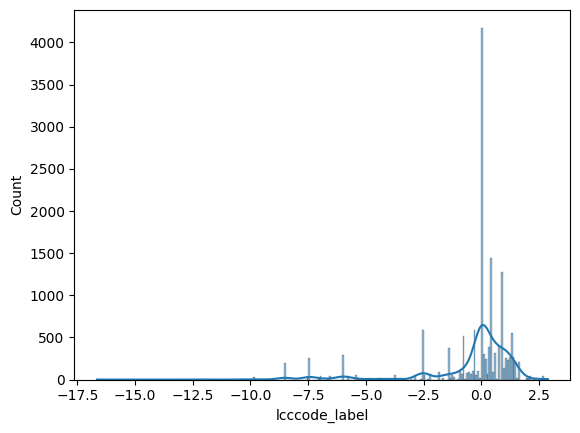

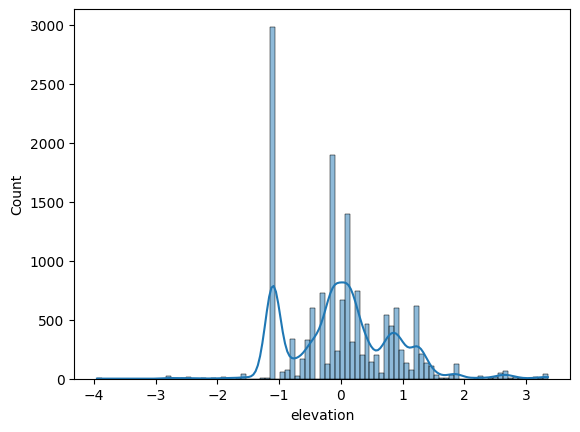

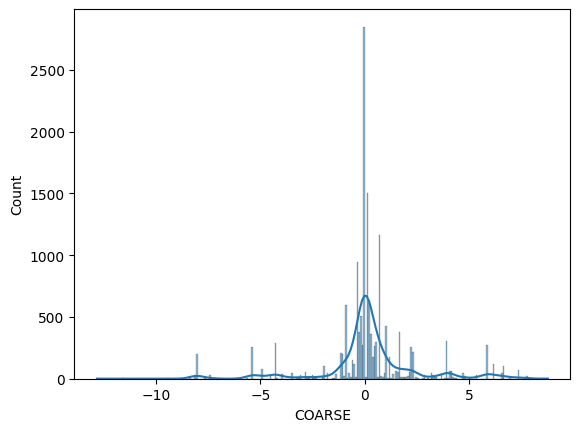

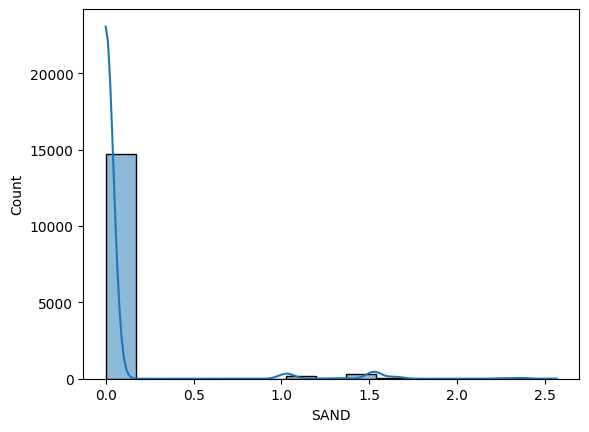

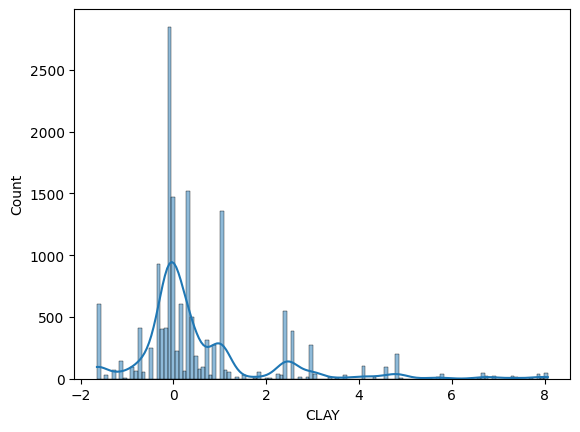

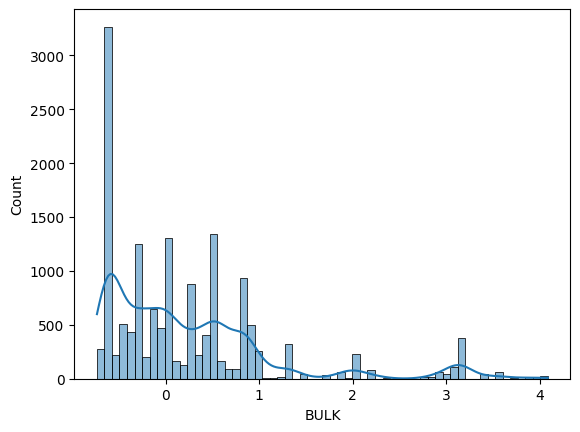

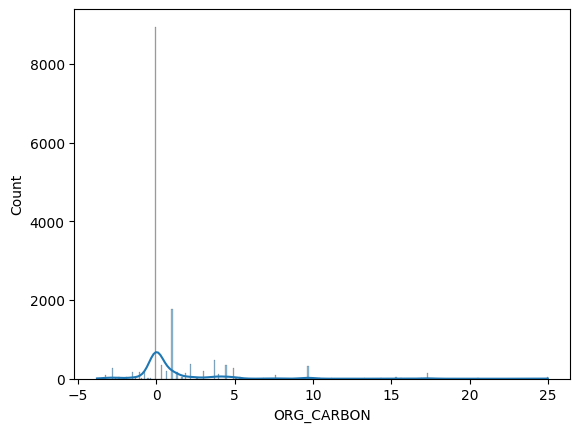

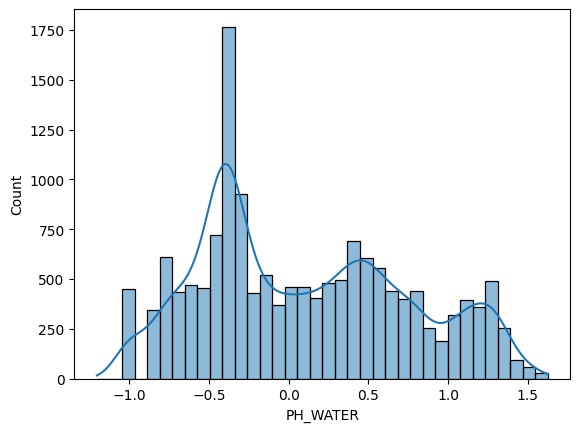

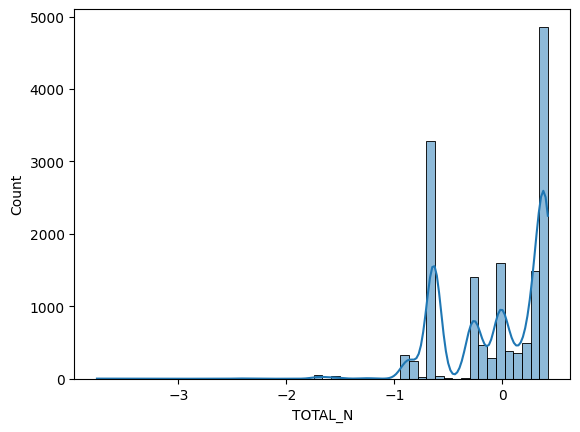

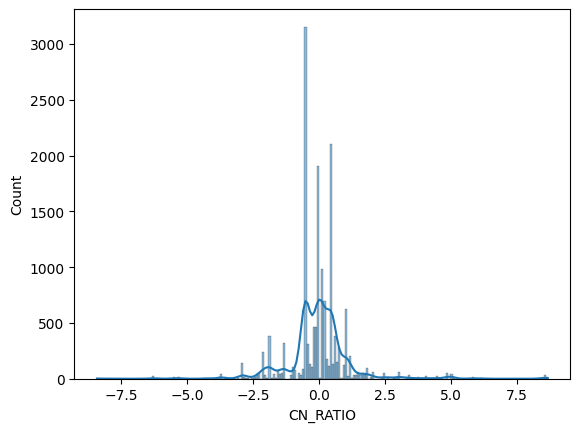

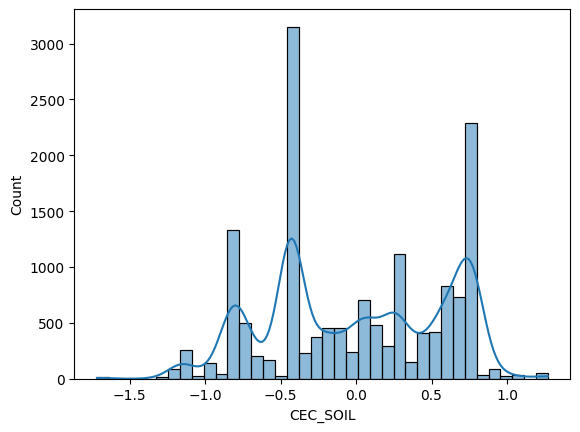

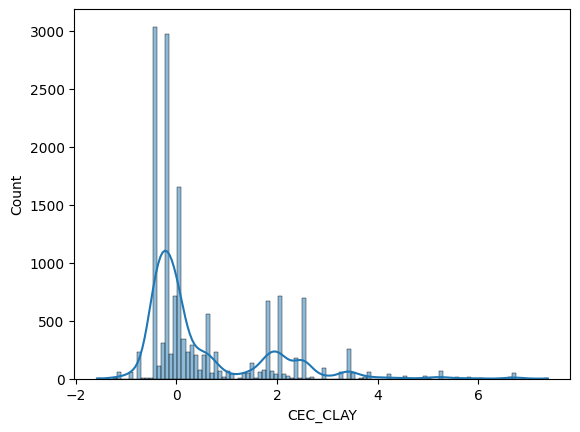

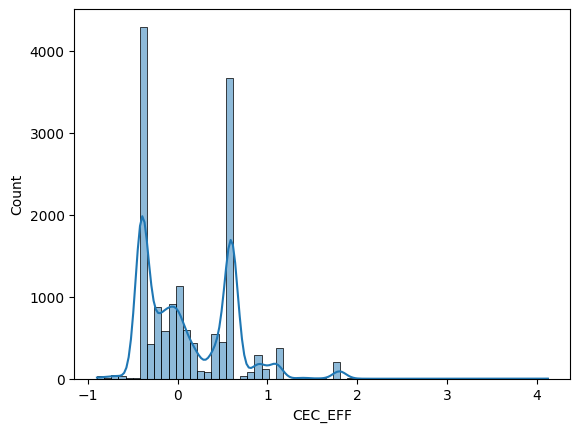

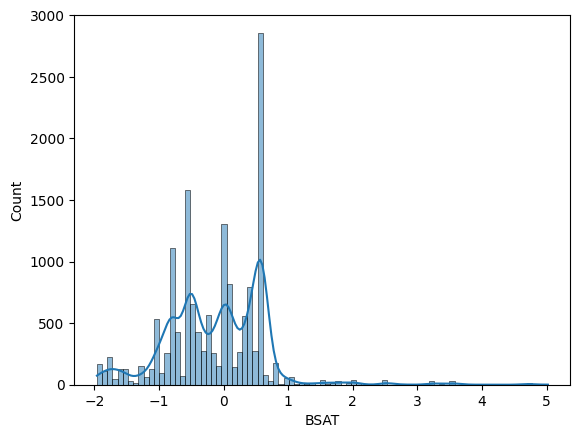

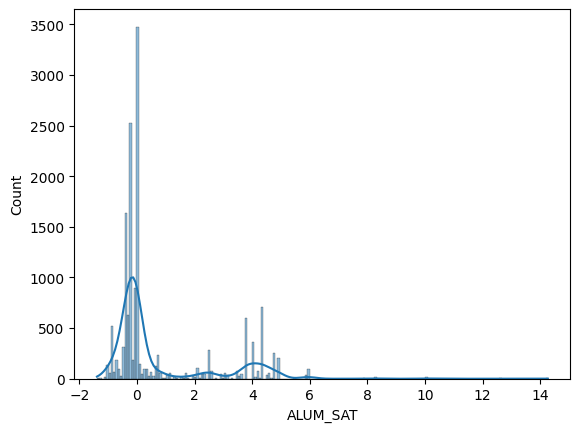

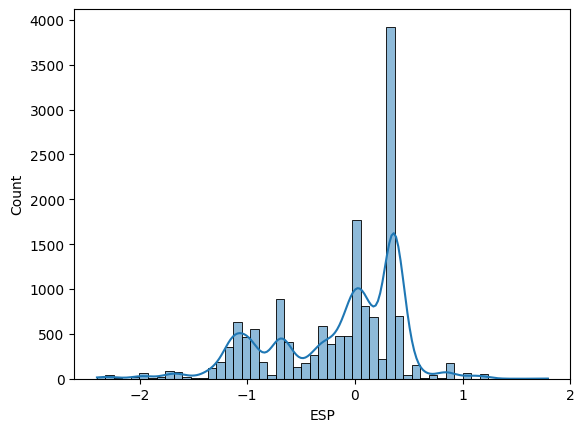

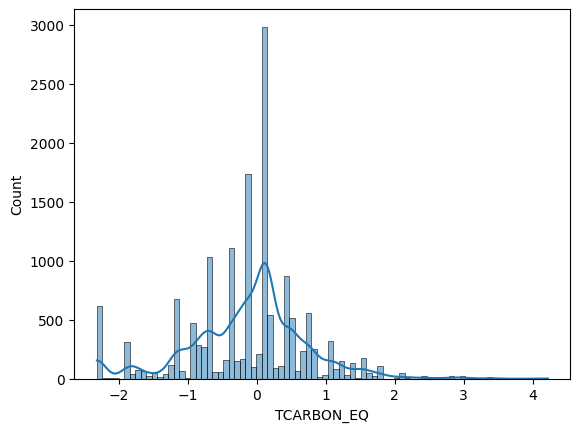

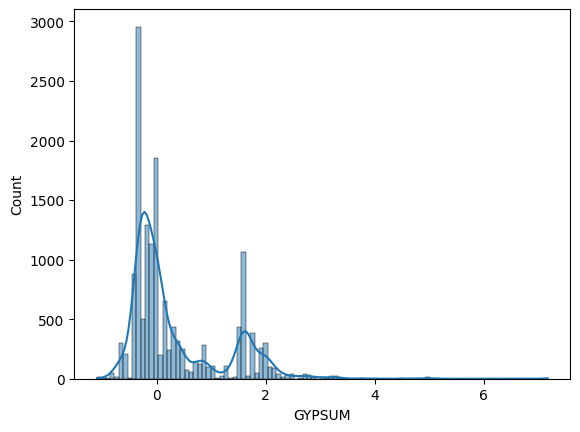

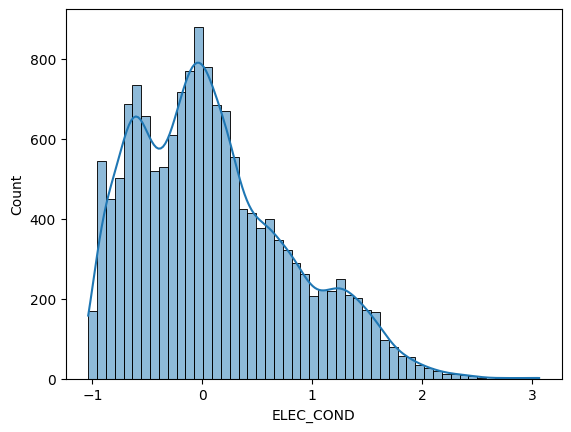

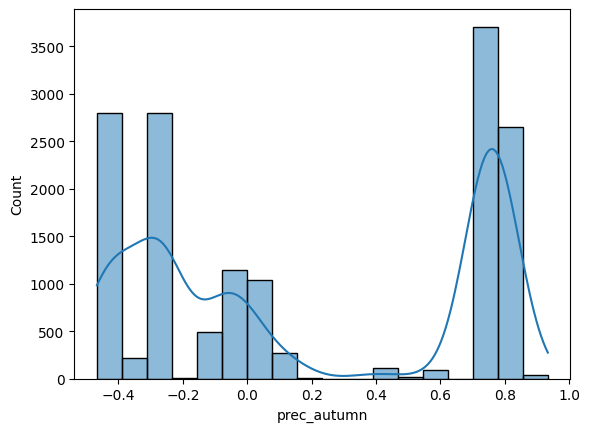

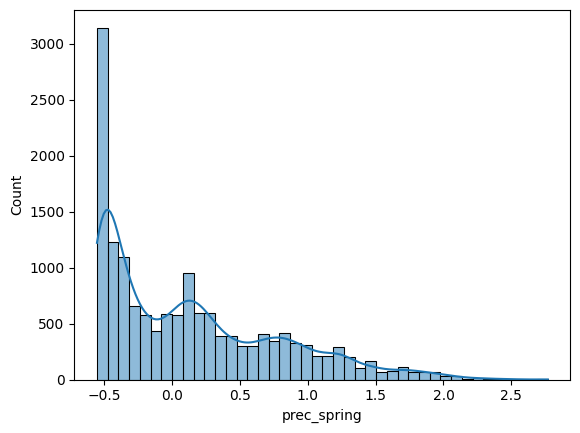

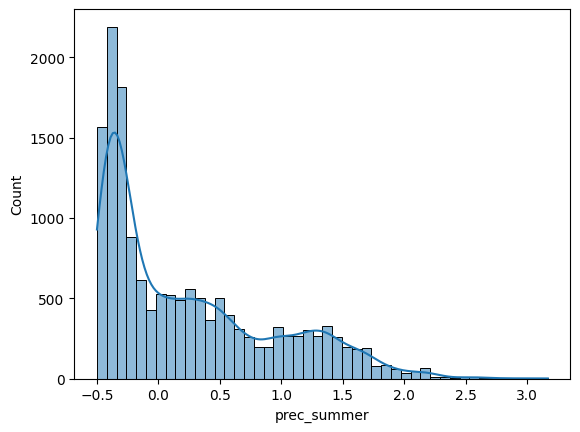

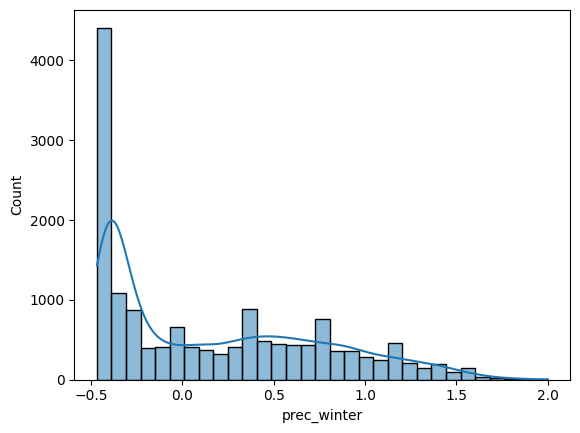

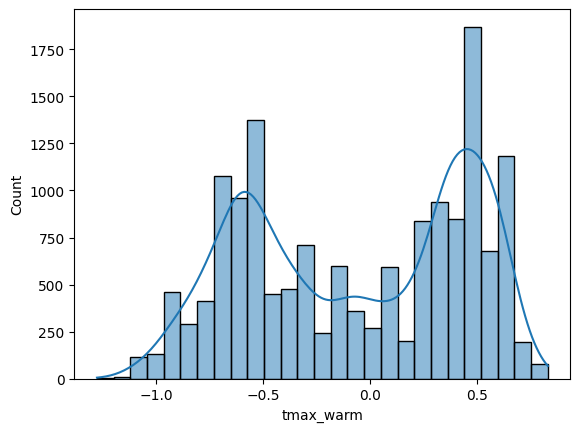

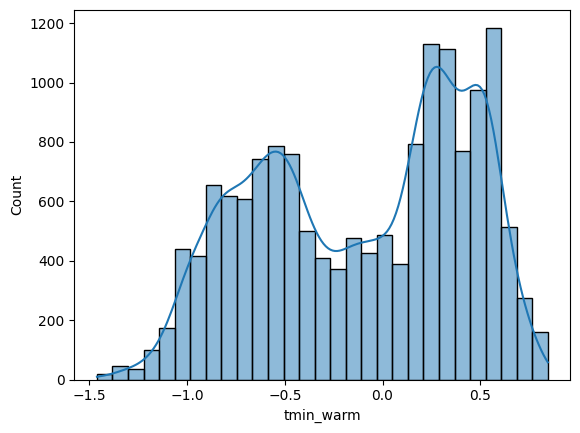

In [ ]:
for col in X_train.columns:
  sns.histplot(data=X_train_scaled, x=col, kde=True)
  plt.show()

Robust scaler seems like the best fit

In [ ]:
# scaler = RobustScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled.head()

In [ ]:
# X_train_scaled.describe()

Before manual feature selection, let's check how many features would preserve 99% of the variance using PCA

13


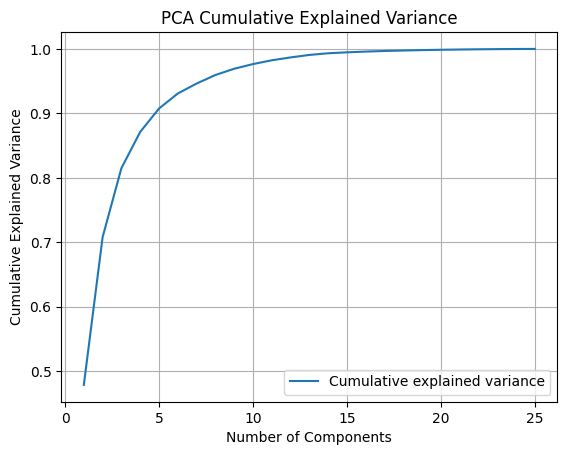

In [ ]:
from sklearn.decomposition import PCA

pca_cumsum = PCA()
pca_cumsum.fit(X_train_scaled)
cumsum = np.cumsum(pca_cumsum.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
print(d)
# Code and method copied from HOML

plt.plot(range(1, cumsum.shape[0] + 1), cumsum, label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

14 components would be enough according to PCA, maybe do more feature scaling

In [ ]:
pca_14 = PCA(n_components=14)
X_train_pca = pca_14.fit_transform(X_train_scaled)

In [ ]:
X_train_pca[:1,:]

array([[ 1.12493053, -1.01345809, -0.51684914,  1.04346667, -0.94677187,
         0.24769587, -0.61748008,  0.06509975,  0.04486741, -0.21605565,
        -0.00563844, -0.18793609, -0.72256797, -0.1100971 ]])

## Resampling

### Oversampling with SMOTE

In [ ]:
! pip install imblearn

((23656, 25), (23656,), np.int64(11828))

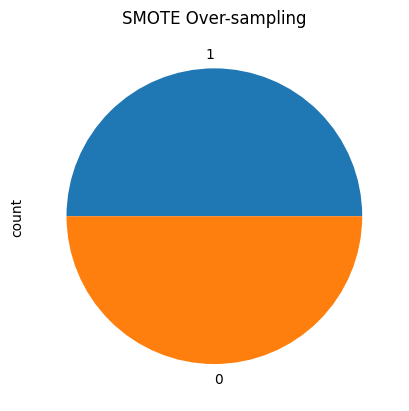

In [ ]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=42)
X_res_o, y_res_o = smot.fit_resample(X_train_scaled, y_train)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

## K-NN test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_res_o, y_res_o)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1_macro')

In [ ]:
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.8937674779725995


In [ ]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11828
           1       0.75      0.96      0.85      3549

    accuracy                           0.92     15377
   macro avg       0.87      0.94      0.90     15377
weighted avg       0.93      0.92      0.92     15377



In [ ]:
print(classification_report(y_res_o, best_knn.predict(X_res_o)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11828
           1       0.91      0.98      0.95     11828

    accuracy                           0.94     23656
   macro avg       0.95      0.94      0.94     23656
weighted avg       0.95      0.94      0.94     23656



### Random Over Sampler

((23656, 25), (23656,), np.int64(11828))

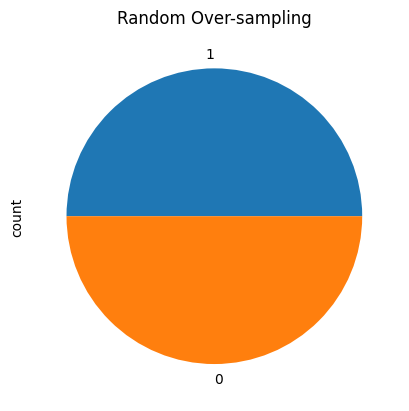

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_res_ros, y_res_ros = ros.fit_resample(X_train_scaled, y_train)
ax=y_res_ros.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_ros.shape, y_res_ros.shape, y_res_ros.sum()

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search2 = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search2.fit(X_res_ros, y_res_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1_macro')

In [ ]:
best_knn = grid_search2.best_estimator_
best_params = grid_search2.best_params_
best_score = grid_search2.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.8948979687166906


In [ ]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     11828
           1       0.74      0.99      0.85      3549

    accuracy                           0.92     15377
   macro avg       0.87      0.94      0.90     15377
weighted avg       0.94      0.92      0.92     15377



## Dropping some more features

### According to MI results

In [ ]:
X_train_scaled.drop(columns=['ELEC_COND', 'ALUM_SAT'], inplace=True)

retraining

((23656, 23), (23656,), np.int64(11828))

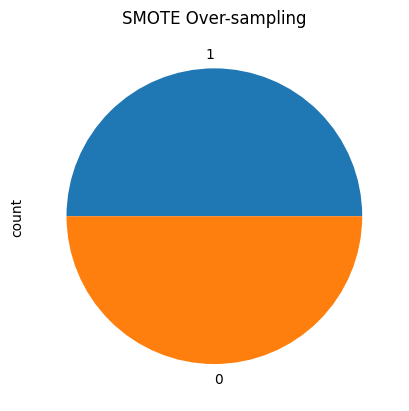

In [ ]:
smot = SMOTE(random_state=42)
X_res_o, y_res_o = smot.fit_resample(X_train_scaled, y_train)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("SMOTE Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_res_o, y_res_o)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1_macro')

In [ ]:
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.88370501651603


In [ ]:
print(classification_report(y_train, best_knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11828
           1       0.76      0.93      0.84      3549

    accuracy                           0.92     15377
   macro avg       0.87      0.92      0.89     15377
weighted avg       0.93      0.92      0.92     15377



In [ ]:
X_train_scaled.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'CLAY', 'BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'BSAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'prec_autumn',
       'prec_spring', 'prec_summer', 'prec_winter', 'tmax_warm', 'tmin_warm'],
      dtype='object')

In [ ]:
df.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'TEXTURE_USDA', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_autumn', 'tmax_spring',
       'tmax_summer', 'tmax_winter', 'tmin_autumn', 'tmin_spring',
       'tmin_summer', 'tmin_winter', 'TEXTURE_SOTER_C', 'TEXTURE_SOTER_F',
       'TEXTURE_SOTER_M', 'fire'],
      dtype='object')

In [ ]:
X_test.columns

Index(['lcccode_label', 'elevation', 'COARSE', 'SAND', 'SILT', 'CLAY', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'TEXTURE_USDA', 'prec_autumn', 'prec_spring',
       'prec_summer', 'prec_winter', 'tmax_autumn', 'tmax_spring',
       'tmax_summer', 'tmax_winter', 'tmin_autumn', 'tmin_spring',
       'tmin_summer', 'tmin_winter', 'TEXTURE_SOTER_C', 'TEXTURE_SOTER_F',
       'TEXTURE_SOTER_M'],
      dtype='object')

In [ ]:
def transform_test_pipeline(X, preprocess):
  X = X.drop(columns=['TEXTURE_USDA', 'TEXTURE_SOTER_M', 'TEXTURE_SOTER_F', 'TEXTURE_SOTER_C', 'TEB', 'REF_BULK', 'SILT'])

  tmax_cols = ['tmax_spring', 'tmax_summer', 'tmax_autumn', 'tmax_winter']
  tmin_cols = ['tmin_spring', 'tmin_summer', 'tmin_autumn', 'tmin_winter']

  # Warm season: Spring + Summer
  X['tmax_warm'] = X[['tmax_spring', 'tmax_summer']].mean(axis=1)
  X['tmin_warm'] = X[['tmin_spring', 'tmin_summer']].mean(axis=1)

  # Cool season: Autumn + Winter
  X['tmax_cool'] = X[['tmax_autumn', 'tmax_winter']].mean(axis=1)
  X['tmin_cool'] = X[['tmin_autumn', 'tmin_winter']].mean(axis=1)

  X = X.drop(columns=tmax_cols + tmin_cols)

  X_scaled = preprocess.transform(X)
  print(X_scaled)

  X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

  X_scaled = X_scaled.drop(columns=['ALUM_SAT', 'ELEC_COND'])

  return X_scaled



In [ ]:
X_test_scaled = transform_test_pipeline(X_test, preprocess)

[[ -3.40413976  -1.64362765  -0.66926466 ...  -0.4          0.55555556
    0.61538462]
 [-14.18292201   0.12792822 -12.58769052 ...   0.66666667  -0.72222222
   -0.69230769]
 [ -4.31177569   0.49845057  -0.41360524 ...   0.73333333  -0.5
   -0.84615385]
 ...
 [ -2.31681482  -0.65582091   0.14434042 ...   1.13333333  -0.61111111
   -0.84615385]
 [ -2.85263412  -0.19076689  -0.52823522 ...  -0.4          0.44444444
    0.30769231]
 [ -3.35755852  -0.83209169   1.20568965 ...  -0.26666667   0.44444444
    0.53846154]]


In [ ]:
X_train_scaled.describe(), X_test_scaled.describe()

(       lcccode_label     elevation        COARSE          SAND          CLAY  \
 count   15377.000000  15377.000000  15377.000000  15377.000000  15377.000000   
 mean       -0.396297      0.012508      0.221486      0.061150      0.540914   
 std         2.119287      0.846392      2.318146      0.299802      1.495254   
 min       -16.651722     -3.952355    -12.837679      0.000000     -1.647962   
 25%        -0.274494     -0.523177     -0.279351      0.000000     -0.078982   
 50%         0.000000      0.000000      0.000000      0.000000      0.000000   
 75%         0.725506      0.476823      0.720649      0.000000      0.921018   
 max         2.882210      3.354733      8.782008      2.564949      8.068829   
 
                BULK    ORG_CARBON      PH_WATER       TOTAL_N      CN_RATIO  \
 count  15377.000000  15377.000000  15377.000000  15377.000000  15377.000000   
 mean       0.242382      1.082860      0.100092     -0.050737     -0.018895   
 std        0.936759      3.1

In [ ]:
X_train_scaled.info(), X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15377 entries, 0 to 15376
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lcccode_label  15377 non-null  float64
 1   elevation      15377 non-null  float64
 2   COARSE         15377 non-null  float64
 3   SAND           15377 non-null  float64
 4   CLAY           15377 non-null  float64
 5   BULK           15377 non-null  float64
 6   ORG_CARBON     15377 non-null  float64
 7   PH_WATER       15377 non-null  float64
 8   TOTAL_N        15377 non-null  float64
 9   CN_RATIO       15377 non-null  float64
 10  CEC_SOIL       15377 non-null  float64
 11  CEC_CLAY       15377 non-null  float64
 12  CEC_EFF        15377 non-null  float64
 13  BSAT           15377 non-null  float64
 14  ESP            15377 non-null  float64
 15  TCARBON_EQ     15377 non-null  float64
 16  GYPSUM         15377 non-null  float64
 17  prec_autumn    15377 non-null  float64
 18  prec_s

(None, None)

In [ ]:
print(classification_report(y_test, best_knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1315
           1       0.43      0.48      0.46       394

    accuracy                           0.74      1709
   macro avg       0.64      0.65      0.64      1709
weighted avg       0.75      0.74      0.74      1709



## More feature selection?